# Case study on Supervised learning

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# 1.Read the dataset to the python environment.

In [2]:
#read the dataset
data=pd.read_excel(r'C:\Users\HP\Downloads\iris.xls')

In [3]:
#display first 5 rows
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#display last 5 rows
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# checking the columns and type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Here, Classification is object datatype.

In [6]:
# checking null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Here, we can conclude that SL,SW and PL having missing values.

In [8]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


since the mean and median of SL,SW,PL are close to one another we can replace the null values with either their mean or median.

In [10]:
# filling the null values of SL,SW,PL
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [11]:
#again checking the null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

There are no null values in the dataset, hence it is clean.

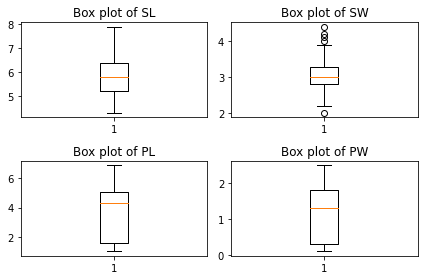

In [13]:
#checking outliers in SL,SW,PL,PW
#boxplot for SL column
plt.subplot(2,2,1)
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

#boxplot for SW column
plt.subplot(2,2,2)
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

#boxplot for PL column
plt.subplot(2,2,3)
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

#boxplot for PW column
plt.subplot(2,2,4)
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

plt.tight_layout()
plt.show()

Here,we can conclude that SW only have outliers

In [14]:
#finding out outliers of SW
data.sort_values('SW',ascending=False)

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
...,...,...,...,...,...
93,5.0,2.3,3.3,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica


so here we find that 4.0,4.1,4.2,4.4,2.0 are the outliers. 
Now let us find the inter quartile range.

In [15]:
#finding the quartiles :first quartile and 3rd quartile
Q1=np.percentile(data['SW'],25)
Q3=np.percentile(data['SW'],75)
print ('Q1 =',Q1,'Q3 =',Q3)
#calculating the inter quartile range
IQR=Q3-Q1
print('IQR =',IQR)
#calculating the upper and lower limits
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit =',low_lim,'\n upper limit =',upper_lim)

Q1 = 2.8 Q3 = 3.275
IQR = 0.4750000000000001
lower limit = 2.0874999999999995 
 upper limit = 3.9875


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


 Here classification is in object data type.
 since machines cannot understand categorical values, we should convert them to numerical values.
Here we use label encoding to convert them into numerical values

In [21]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [22]:
#encoding the classification column
data['Classification']=enc.fit_transform(data['Classification']) 

In [23]:
#creating traing and testing set
X=data.drop('Classification',axis=1)
y=data['Classification']

In [24]:
#spliting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [25]:
#SVM
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')

In [26]:
classifier.fit(X_train,y_train)

SVC()

In [27]:
y_pred=classifier.predict(X_test)

In [28]:
# evaluating the models
from sklearn.metrics import confusion_matrix,accuracy_score

In [29]:
print('accuracy score is ',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy score is  0.9736842105263158


array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

so by svm model we have an accuracy score of 97% which is pretty good and the confusion matrix shows only one wrong predicted value

In [30]:
#logic regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_predicted=logit_model.predict(X_test)

In [31]:
print('accuracy score is ',accuracy_score(y_test,y_predicted))
confusion_matrix(y_test,y_predicted)

accuracy score is  0.9736842105263158


array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

Here also we have an accuracy score of 97% and cofusion matrix shows only 1 error

In [32]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred1=dtc.predict(X_test)

In [34]:
print('accuracy score is ',accuracy_score(y_test,y_pred1))
confusion_matrix(y_test,y_pred1)

accuracy score is  1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

so here we can see that our accuracy score is 100% and there is no error in predicted values as shown by the confusion matrix also. So clearly decision tree would be the best model to choose to predict values in this problem

In [35]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_pred2=rf.predict(X_test)

In [37]:
print('accuracy score is ',accuracy_score(y_test,y_pred2))
confusion_matrix(y_test,y_pred2)

accuracy score is  1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

so here also we can see that our accuracy score is 100% and there is no error in predicted values as shown by the confusion matrix also.


Therefore random forest and decision tree is the best model to use for this problem